# Practica 4: Detección Multicolinealidad

## Multicolinealidad

In [2]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

In [3]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1 = sm.OLS(y, sm.add_constant(X)).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           9.74e-19
Time:                        17:38:47   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
print("El condition number: ", mco1.condition_number)
print("Tendriamos problemas de multicolinealidad si fuese mayor que 900, ya que esta al cuadrado")

El condition number:  409.51474625747227
Tendriamos problemas de multicolinealidad si fuese mayor que 900, ya que esta al cuadrado


In [17]:
import statsmodels.stats.outliers_influence as oi

print("Test de los Vifs:")
print("--> Factor de inflacion de la varianza, con el for hacemos que salga  para toda las variables")
print("--> Hay problema de multicolinealidad, si vif es mayor que 10 y si es mayor que 20, problema grave")

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variables para los vifs: ", vars)
print("Resultado de los vifs: ", vifs)

Test de los Vifs:
--> Factor de inflacion de la varianza, con el for hacemos que salga  para toda las variables
--> Hay problema de multicolinealidad, si vif es mayor que 10 y si es mayor que 20, problema grave
Variables para los vifs:  ['llotsize', 'lsqrft', 'bdrms']
Resultado de los vifs:  [284.46202849274715, 320.08665791337097, 22.243172883072834]


In [21]:
#Matriz de correlacciones
print("Matriz de autocorrelacion: ")
corr_matrix=np.corrcoef(X.T) #X.T = matriz X traspuesta
print(corr_matrix)

print("\n Lo ideal es que la matriz fuese la identidad")

Matriz de autocorrelacion: 
[[1.         0.31129925 0.16949022]
 [0.31129925 1.         0.51957927]
 [0.16949022 0.51957927 1.        ]]

 Lo ideal es que la matriz fuese la identidad


Matriz de autocorrelacion a nivel visual: 


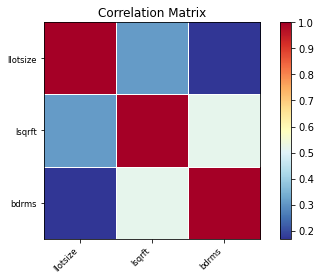

In [22]:
import statsmodels.graphics.api as smg
print("Matriz de autocorrelacion a nivel visual: ")
smg.plot_corr(corr_matrix, xnames=["llotsize", "lsqrft", "bdrms"])
plt.show()

In [9]:
#Datos de Theil
import pandas as pd
datos = pd.read_csv('Theil.csv', delimiter=";")
datos
y=datos['consume']
X=datos[['income', 'relprice']]
mco2 = sm.OLS(y, sm.add_constant(X)).fit()
mco2.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           6.51e-10
Time:                        17:38:48   Log-Likelihood:                -51.647
No. Observations:                  17   AIC:                             109.3
Df Residuals:                      14   BIC:                             111.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.7066     27.094      4.824      0.000      72.595     188.818
income         1.0617      0.267      3.981      0.001       0.490       1.634
relprice      -1.3830      0.084    -16.501      0.000      -1.563      -1.203
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.666
Skew:                          -0.031   Prob(JB):                        0.717
Kurtosis:                       2.032   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print("Resusltado de los vifs: ")
vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifs)


print("\n Matriz de autocorrelacion: ")
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

Resusltado de los vifs: 
[284.46202849274715, 320.08665791337097, 22.243172883072834]

 Matriz de autocorrelacion: 
[[1.         0.31129925 0.16949022]
 [0.31129925 1.         0.51957927]
 [0.16949022 0.51957927 1.        ]]


# Normalidad de los Residuos

- Jarque-Bera: Test de hipótesis que contrasta si los datos de la muestra tienen el coeficiente de simetría y la curtósis de una distribución normal.
- $\chi^2$ (p-valor): p-valor del Test de Jaque-Bera.
- Skew: Coeficiente de Simetría de pearson de los residuos.
- Kurtosis: Coeficiente de apuntamiento de los residuos.
- Komogorov-Smirnov: Test de Hipótesis para contrastar si una muestra proviene de una distribución (en este caso normal).

In [11]:
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco1.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera 34.8894458284073
Chi^2 two-tail prob. 2.6537077943350284e-08
Skew -0.18756944389904323
Kurtosis 6.0617926485327285


--> Jarque-Bera mide kurtosis y skew y tiene que tener mayor que mi p-valor de chi cuadrado

--> Chi^2 si el valor es mayor que alfa 0.05 sigue una distribucion normal

--> Skew si el valor es proximo a 0, quiere decir que es simetrico

--> Kurtosis debe aproximarse a 3, tiene un valor de 6, entonces no

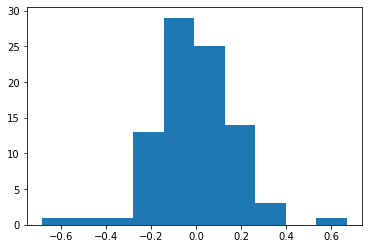

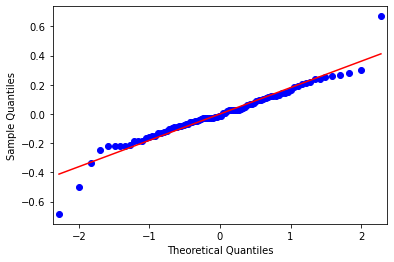

In [12]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

In [29]:
import statsmodels.stats.diagnostic as diag

print("Test de Kolgomorov Smirnov:")
print("Resultado: ", diag.kstest_normal(mco1.resid))
print("Tiene que tener un p-valor > 0.05, para seguir una districion normal")

Test de Kolgomorov Smirnov:
Resultado:  (0.06649909936772903, 0.48573382397461373)
Tiene que tener un p-valor > 0.05, para seguir una districion normal


# Bootstrap

In [14]:
datos=dataWoo("hprice1")
y=datos["lprice"]
vars=["llotsize", "lsqrft", "bdrms"]
X=datos[vars]

mco1=sm.OLS(y, sm.add_constant(X)).fit()


from random import choices

beta=[]
n=len(y)
for it in range(10000): #repetimos 1000 veces la estimacion
    I=choices(list(range(n)), k=n) # elegimos una muestra con repeticion de los datos
    mco3 = sm.OLS(y[I], sm.add_constant(X.values[I,:])).fit() #ajustamos el modelo
    beta.append(list(mco3.params)) # guardamos los coeficientes
beta=np.array(beta)
k=len(X.T)+1
for i in range(k):
    q025=np.percentile(beta[:,i], 2.5) #percentil 2.5%
    q975=np.percentile(beta[:,i], 97.5) #percentil 97.5%
    media=np.mean(beta[:,i]) #media de los betas
    sd=np.std(beta[:,i]) #desviación tipica de los betas
    print(i, media,[q025, q975])
    

0 -1.345587522644391 [-2.997542234161241, 0.08333171305805963]
1 0.1812092763012576 [0.10769157228592618, 0.3136983635141882]
2 0.6922784776008808 [0.46970505689322345, 0.9251434290440065]
3 0.03413069164989981 [-0.03796893046941162, 0.08954871257217961]


In [15]:
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           9.74e-19
Time:                        17:39:10   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2970      0.651     -1.992      0.050      -2.592      -0.002
llotsize       0.1680      0.038      4.388      0.000       0.092       0.244
lsqrft         0.7002      0.093      7.540      0.000       0.516       0.885
bdrms          0.0370      0.028      1.342      0.183      -0.018       0.092
==============================================================================
Omnibus:                       12.060   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.889
Skew:                          -0.188   Prob(JB):                     2.65e-08
Kurtosis:                       6.062   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""